<a href="https://colab.research.google.com/github/A-THAKUR22/AprilAssignments/blob/main/Assignment6April8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heart Disease Prediction Using Logistic Regression
World Health Organization has estimated that four out of five cardiovascular disease (CVD) deaths are due to heart attacks. This whole research intends to pinpoint the ratio of patients who possess a good chance of being affected by CVD and also to predict the overall risk using Logistic Regression.

In [152]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [153]:
#Read the data from csv files
CVD_data=pd.read_csv('framingham.csv')
CVD_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [154]:
#Find null values
CVD_data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [155]:
#Replacing the null values
med_edu=CVD_data['education'].median()
med_cig=CVD_data['cigsPerDay'].median()
med_BP=CVD_data['BPMeds'].median()
med_Chol=CVD_data['totChol'].median()
med_BMI=CVD_data['BMI'].median()
med_glu=CVD_data['glucose'].median()
med_heart=CVD_data['heartRate'].median()

CVD_data['education'].fillna(med_edu,inplace=True)
CVD_data['cigsPerDay'].fillna(med_cig,inplace=True)
CVD_data['BPMeds'].fillna(med_BP,inplace=True)
CVD_data['totChol'].fillna(med_Chol,inplace=True)
CVD_data['glucose'].fillna(med_glu,inplace=True)
CVD_data['BMI'].fillna(med_BMI,inplace=True)
CVD_data['heartRate'].fillna(med_heart,inplace=True)

In [156]:
CVD_data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [157]:
#Counting the number of values in the target column
CVD_data['TenYearCHD'].value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

In [158]:
#Performing oversampling
from imblearn.over_sampling import SMOTE

<Axes: xlabel='male', ylabel='Count'>

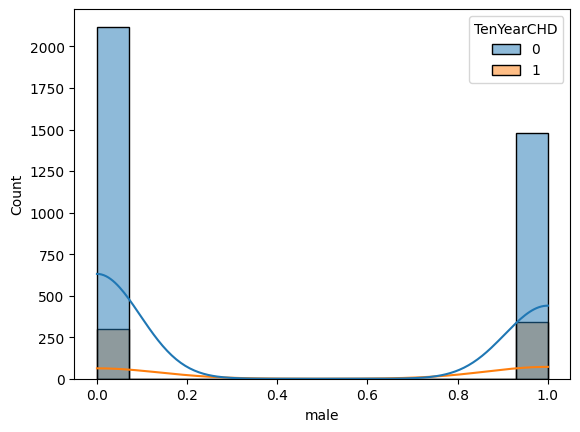

In [159]:
#Plotting graphs based on the various features with respect to the target variable
sns.histplot(data=CVD_data,x='male',hue='TenYearCHD',kde=True)

<Axes: xlabel='age', ylabel='Count'>

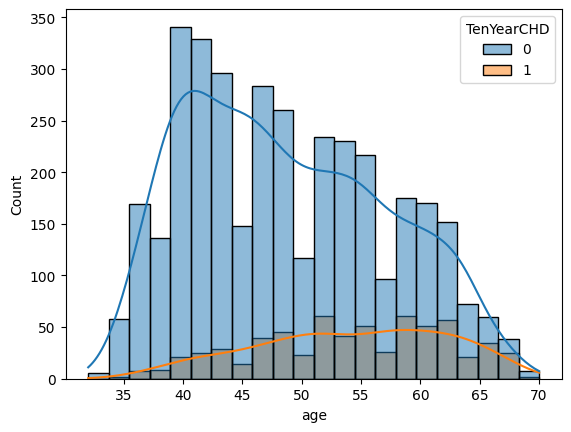

In [160]:
sns.histplot(data=CVD_data,x='age',hue='TenYearCHD',kde=True)

<Axes: xlabel='currentSmoker', ylabel='Count'>

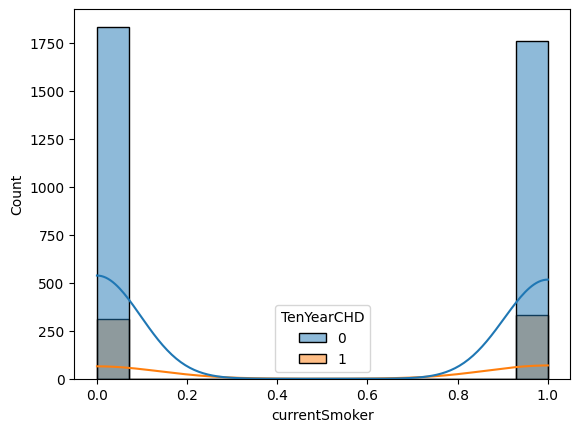

In [161]:
sns.histplot(data=CVD_data,x='currentSmoker',hue='TenYearCHD',kde=True)

<Axes: xlabel='cigsPerDay', ylabel='Count'>

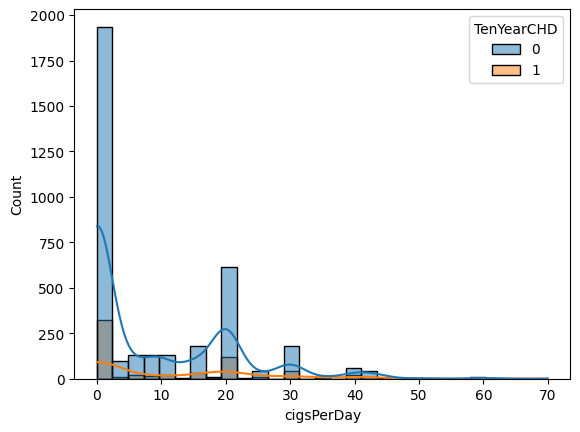

In [162]:
sns.histplot(data=CVD_data,x='cigsPerDay',hue='TenYearCHD',kde=True)

<Axes: xlabel='BPMeds', ylabel='Count'>

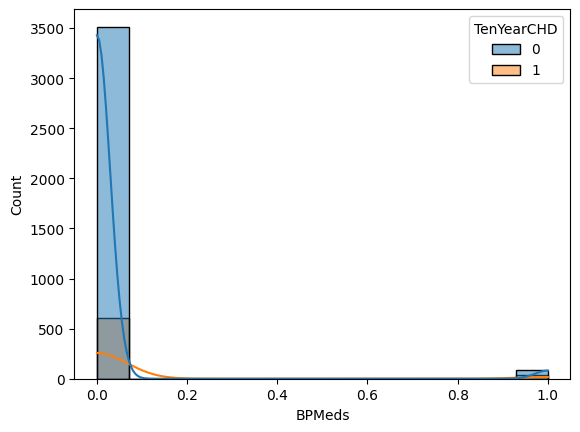

In [163]:
sns.histplot(data=CVD_data,x='BPMeds',hue='TenYearCHD',kde=True)

<Axes: xlabel='totChol', ylabel='Count'>

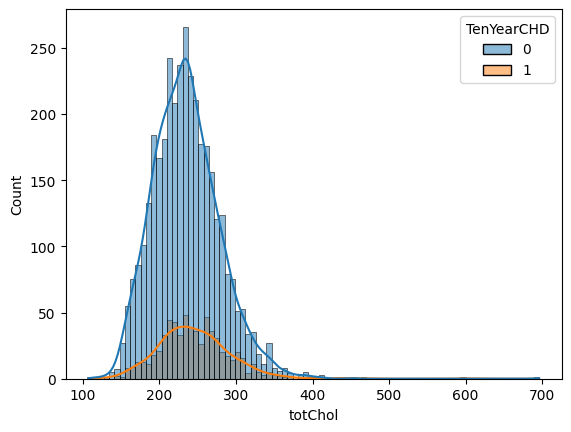

In [164]:
sns.histplot(data=CVD_data,x='totChol',hue='TenYearCHD',kde=True)

<Axes: xlabel='sysBP', ylabel='Count'>

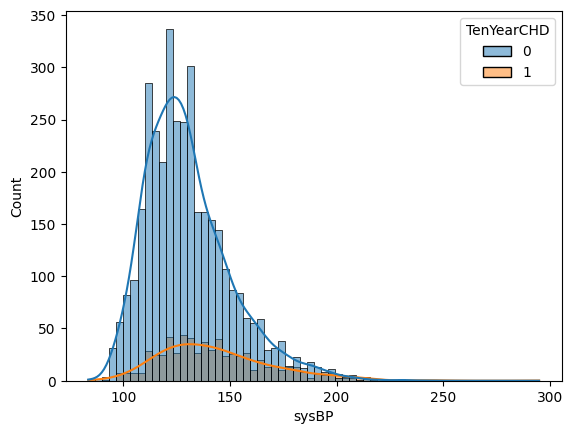

In [165]:
sns.histplot(data=CVD_data,x='sysBP',hue='TenYearCHD',kde=True)

<Axes: xlabel='diaBP', ylabel='Count'>

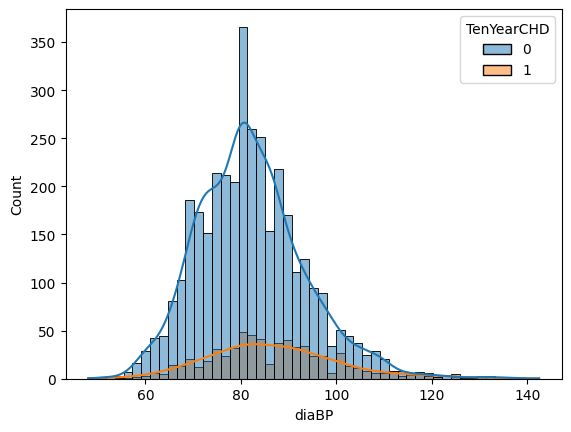

In [166]:
sns.histplot(data=CVD_data,x='diaBP',hue='TenYearCHD',kde=True)

<Axes: xlabel='BMI', ylabel='Count'>

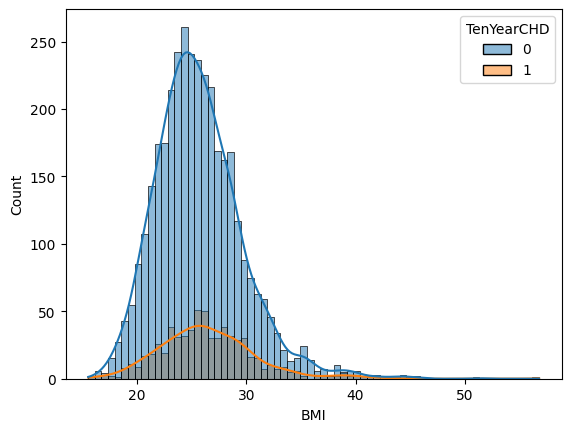

In [167]:
sns.histplot(data=CVD_data,x='BMI',hue='TenYearCHD',kde=True)

<Axes: xlabel='heartRate', ylabel='Count'>

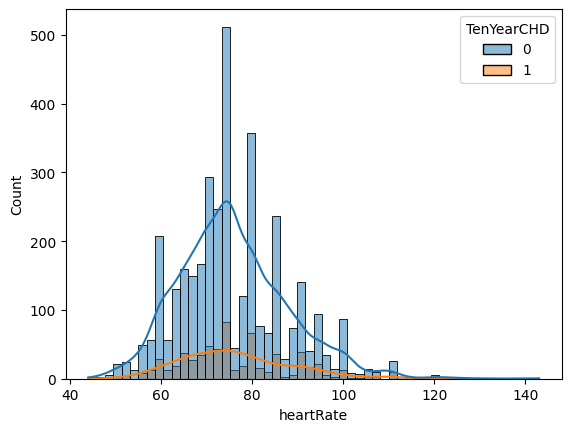

In [168]:
sns.histplot(data=CVD_data,x='heartRate',hue='TenYearCHD',kde=True)

<Axes: xlabel='glucose', ylabel='Count'>

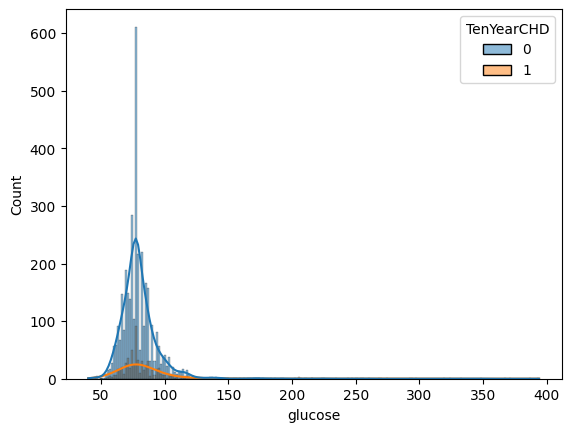

In [169]:
sns.histplot(data=CVD_data,x='glucose',hue='TenYearCHD',kde=True)

<Axes: >

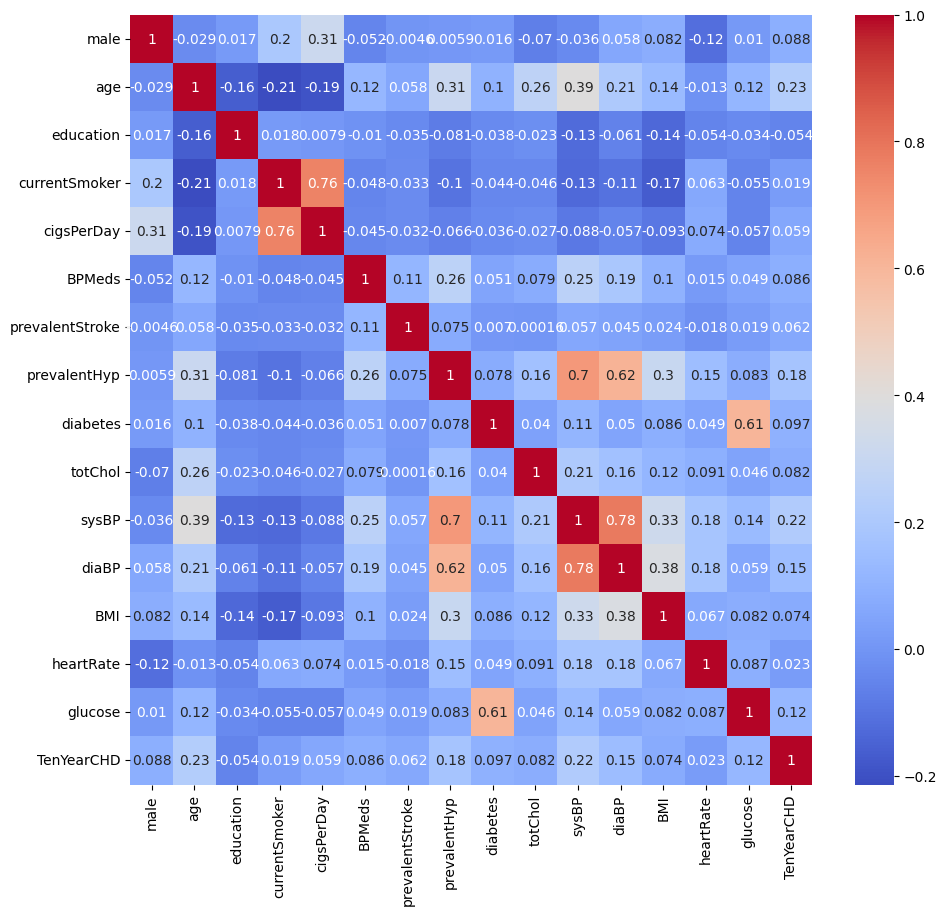

In [170]:
#Plotting the correlation with heatmap
plt.figure(figsize=(11, 10))
correlation=CVD_data.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [171]:
#Checking correlation of target variables with the target variable
correlation_CHD=CVD_data.corr()['TenYearCHD'].drop('TenYearCHD')
correlation_CHD

male               0.088374
age                0.225408
education         -0.053570
currentSmoker      0.019448
cigsPerDay         0.058729
BPMeds             0.086448
prevalentStroke    0.061823
prevalentHyp       0.177458
diabetes           0.097344
totChol            0.081749
sysBP              0.216374
diaBP              0.145112
BMI                0.074326
heartRate          0.022851
glucose            0.121319
Name: TenYearCHD, dtype: float64

In [188]:
#Dividing the data in (X) into features and target variable (y)
X=CVD_data[['age','prevalentHyp','diabetes','sysBP','diaBP']]
y=CVD_data['TenYearCHD']

In [189]:
X

,age,prevalentHyp,diabetes,sysBP,diaBP
0,39,0,0,106.0,70.0
1,46,0,0,121.0,81.0
2,48,0,0,127.5,80.0
3,61,1,0,150.0,95.0
4,46,0,0,130.0,84.0
...,...,...,...,...,...
4235,48,0,0,131.0,72.0
4236,44,0,0,126.5,87.0
4237,52,0,0,133.5,83.0
4238,40,1,0,141.0,98.0


In [190]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4240, dtype: int64

In [191]:
#Resampling the data
oversampler=SMOTE()
X_res, y_res = oversampler.fit_resample(X, y)

In [192]:
#Splitting the data into Training data , testing data and training the model
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [193]:
#Making predictions on testing data
y_pred=model.predict(X_test)
print(f'Prdeictions on risk of having CVD: {y_pred}')

Prdeictions on risk of having CVD: [0 0 1 ... 0 0 1]


In [194]:
#Checking accuracy of our model
Accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy of the model:{Accuracy}')

Accuracy of the model:0.6851980542043086


In [195]:
pred2=model.predict(X_train)
acc2=accuracy_score(y_train,pred2)
acc2

0.6594820093864071